# Clustering

##### 1. Código para el preprocesamiento y selección de variables para clustering

 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   budget                     10000 non-null  int64  
 2   genres                     9947 non-null   object 
 3   homePage                   4193 non-null   object 
 4   productionCompany          9543 non-null   object 
 5   productionCompanyCountry   8720 non-null   object 
 6   productionCountry          9767 non-null   object 
 7   revenue                    10000 non-null  float64
 8   runtime                    10000 non-null  int64  
 9   video                      9514 non-null   object 
 10  director                   9926 non-null   object 
 11  actors                     9920 non-null   object 
 12  actorsPopularity           9913 non-null   object 
 13  actorsCharacter      

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48



 Valores nulos por columna:
id                              0
budget                          0
genres                         53
homePage                     5807
productionCompany             457
productionCompanyCountry     1280
productionCountry             233
revenue                         0
runtime                         0
video                         486
director                       74
actors                         80
actorsPopularity               87
actorsCharacter                47
originalTitle                   0
title                           0
originalLanguage                0
popularity                      0
releaseDate                     0
voteAvg                         0
voteCount                       0
genresAmount                    0
productionCoAmount              0
productionCountriesAmount       0
actorsAmount                    0
castWomenAmount                 0
castMenAmount                   0
dtype: int64

 Identificación de columnas con poca va

<Figure size 1200x800 with 0 Axes>

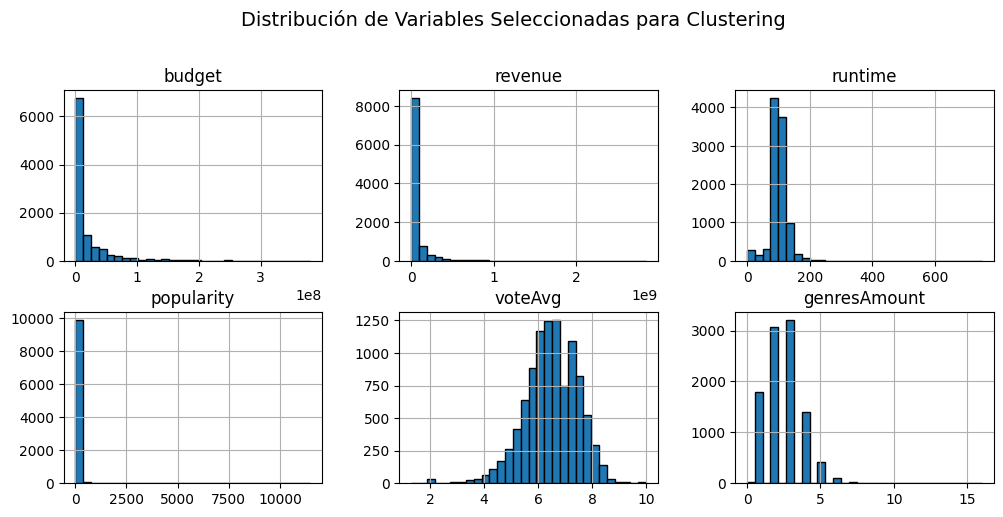


 Datos normalizados listos para clustering.


,budget,revenue,runtime,popularity,voteAvg,genresAmount
0,-0.397316,-0.350858,-0.081656,-0.140800,-0.796048,-0.51667
1,0.066850,-0.298179,0.350365,-0.192867,0.016775,0.34950
2,-0.206189,4.804586,0.746384,0.224296,1.744022,0.34950
3,2.060032,5.907272,-0.009652,0.383175,1.337611,-0.51667
4,0.995181,4.149340,1.502421,0.033948,2.048831,0.34950



 Archivo con datos preprocesados guardado como 'movies_clustering_ready.csv'


In [16]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset limpio
data_path = "../../data/movies_clean.csv"
df = pd.read_csv(data_path)

# Mostrar información general del dataset
print(" Información del dataset:")
print(df.info())

# Mostrar primeras filas del dataset
print("\n Vista previa de los datos:")
display(df.head())

# Identificar columnas con valores nulos
print("\n Valores nulos por columna:")
print(df.isnull().sum())

# Identificar columnas con valores únicos o casi constantes
print("\n Identificación de columnas con poca variabilidad:")
low_variance_columns = [col for col in df.columns if df[col].nunique() <= 1]
print("Columnas con una única categoría:", low_variance_columns)

# **Eliminar columnas irrelevantes**
columns_to_drop = [
    "id",  # No aporta información
    "title",  # No es útil para clustering
    "releaseDate",  # Fecha en formato de texto
    "originalLanguage",  # Idioma original, puede ser categórica pero no aporta a la agrupación
    "productionCountriesAmount",  # No aporta suficiente variabilidad
    "productionCoAmount",  # Poca variabilidad
    "actorsPopularity",  # Es una variable difícil de interpretar y procesar correctamente.
    "actorsAmount"  # Puede estar correlacionado con actoresPopularity
]

df_filtered = df.drop(columns=columns_to_drop)

print("\n Columnas después de eliminar las irrelevantes:")
print(df_filtered.columns)

# **Seleccionar las variables para clustering**
selected_variables = [
    "budget",  # Presupuesto
    "revenue",  # Ingresos
    "runtime",  # Duración
    "popularity",  # Popularidad
    "voteAvg",  # Promedio de calificación
    "genresAmount",  # Número de géneros asociados
]

df_clustering = df_filtered[selected_variables]

print("\n Variables seleccionadas para clustering:")
print(df_clustering.columns)

# **Visualización de la distribución de las variables seleccionadas**
plt.figure(figsize=(12, 8))
df_clustering.hist(bins=30, figsize=(12, 8), layout=(3, 3), edgecolor="black")
plt.suptitle("Distribución de Variables Seleccionadas para Clustering", fontsize=14)
plt.show()

# **Normalización de datos**
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns)

print("\n Datos normalizados listos para clustering.")
display(df_scaled.head())

# **Guardar datos preprocesados para clustering**
df_scaled.to_csv("../../data/movies_clustering_ready.csv", index=False)
print("\n Archivo con datos preprocesados guardado como 'movies_clustering_ready.csv'")


##### 2. Hopkings y la VAT (VisualAssessment of cluster Tendency)

Estadístico de Hopkins: 1.0000


<Figure size 800x800 with 0 Axes>

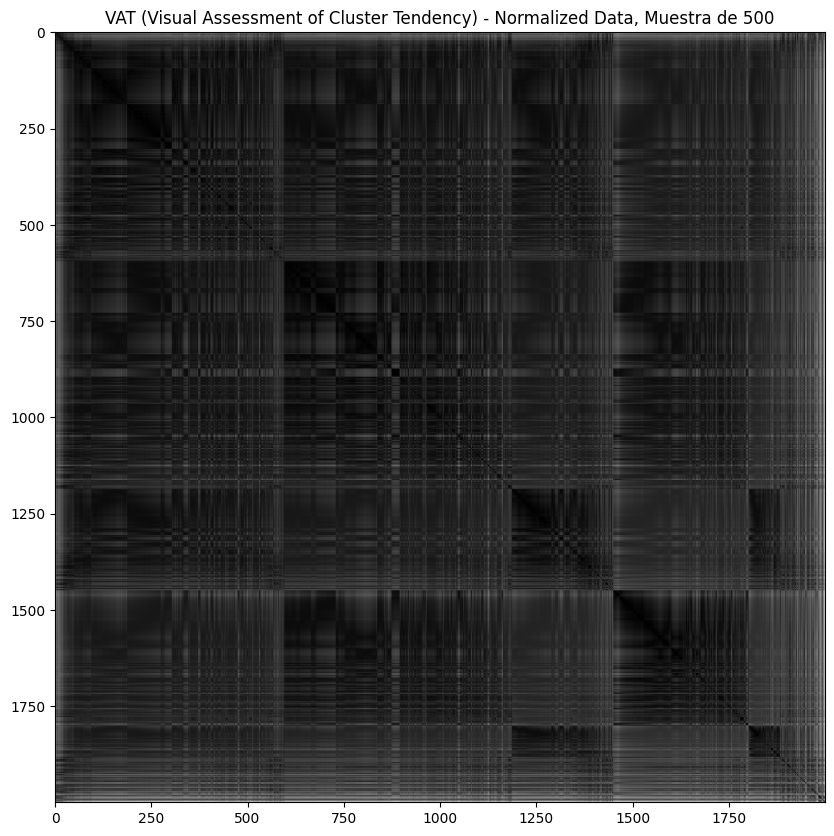

<Figure size 800x800 with 0 Axes>

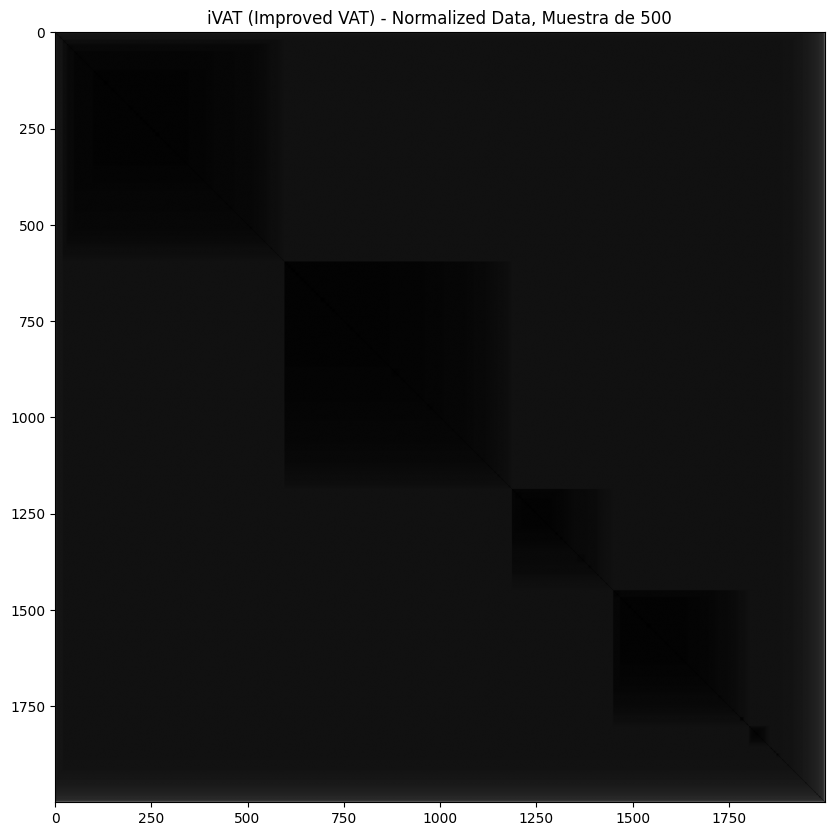

In [ ]:
import numpy as np
import pandas as pd
import random
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from pyclustertend import vat, ivat
from sklearn.preprocessing import MinMaxScaler


# Cargar los datos
file_path = "../../data/movies_clean.csv"
df = pd.read_csv(file_path)

# Seleccionar solo las variables numéricas para clustering
data = df[['budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 'genresAmount']].values

### 1. Estadístico de Hopkins
def hopkins_stat(X, sample_size=100):
    n, d = X.shape
    sample_size = min(sample_size, n)

    # Seleccionar muestra aleatoria de datos reales
    real_sample = X[np.random.choice(n, sample_size, replace=False)]

    # Generar puntos aleatorios dentro del espacio de datos
    min_vals, max_vals = X.min(axis=0), X.max(axis=0)
    random_sample = np.random.uniform(min_vals, max_vals, (sample_size, d))

    # Calcular distancias más cercanas
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    real_distances, _ = nbrs.kneighbors(real_sample)
    random_distances, _ = nbrs.kneighbors(random_sample)

    # Calcular el estadístico de Hopkins
    H = random_distances.sum() / (real_distances.sum() + random_distances.sum())
    return H

# Calcular Hopkins
hopkins_value = hopkins_stat(data, sample_size=500)
print(f"Estadístico de Hopkins: {hopkins_value:.4f}")

# Interpretación:
# - Si H ≈ 0.5 → Datos aleatorios (sin tendencia a clusterizarse).
# - Si H < 0.5 → Datos dispersos (no hay clusters claros).
# - Si H > 0.5 → Datos tienen estructura de clusters.

# Normalizar los datos para evitar valores extremos
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Reducir la muestra a 2000 puntos para mejorar la visualización
sample_size = 1000
if data_normalized.shape[0] > sample_size:
    sampled_data = data_normalized[np.random.choice(data_normalized.shape[0], sample_size, replace=False)]
else:
    sampled_data = data_normalized

# Generar y visualizar VAT
plt.figure(figsize=(8, 8))
vat(sampled_data)
plt.title("VAT (Visual Assessment of Cluster Tendency) - Normalized Data, Muestra de 1000")
plt.show()

# Generar y visualizar iVAT (versión mejorada con menos ruido visual)
plt.figure(figsize=(8, 8))
ivat(sampled_data)
plt.title("iVAT (Improved VAT) - Normalized Data, Muestra de 1000")
plt.show()

##### 3. Método del Codo para encontrar el número óptimo de clusters

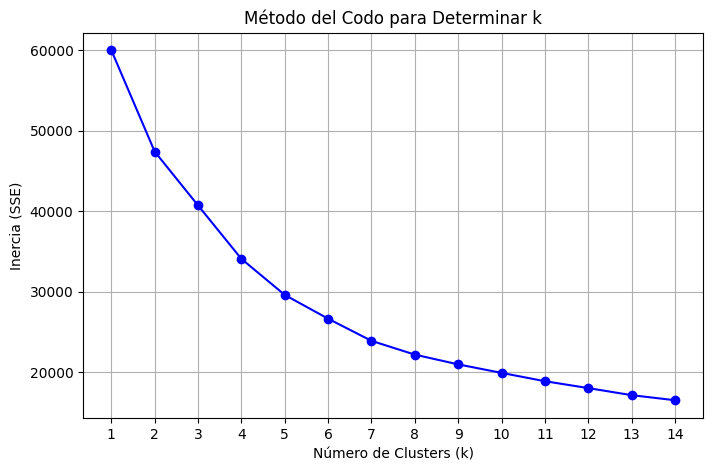

In [17]:
from sklearn.cluster import KMeans

inertia = []  # Lista para almacenar la inercia de cada k
K_range = range(1, 15)  # Evaluamos entre 1 y 15 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)  # Usamos los datos ya normalizados
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-", color="blue")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia (SSE)")
plt.title("Método del Codo para Determinar k")
plt.xticks(K_range)
plt.grid()
plt.show()



Distribución de películas por cluster:
cluster
3    5037
0    4342
2     613
1       8
Name: count, dtype: int64


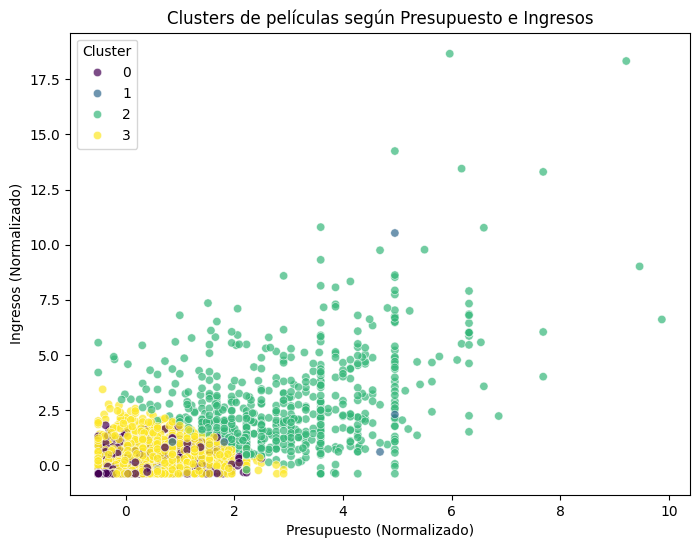

In [18]:
# Aplicar K-Means con k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_scaled["cluster"] = kmeans.fit_predict(df_scaled)

# Mostrar el número de elementos en cada cluster
cluster_counts = df_scaled["cluster"].value_counts()
print("\nDistribución de películas por cluster:")
print(cluster_counts)

# Visualización de los clusters en función de dos variables (ejemplo: presupuesto e ingresos)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_scaled["budget"],
    y=df_scaled["revenue"],
    hue=df_scaled["cluster"],
    palette="viridis",
    alpha=0.7
)
plt.xlabel("Presupuesto (Normalizado)")
plt.ylabel("Ingresos (Normalizado)")
plt.title("Clusters de películas según Presupuesto e Ingresos")
plt.legend(title="Cluster")
plt.show()


Resumen de estadísticas por cluster:


C:\Users\Andy Ortega\AppData\Local\Temp\ipykernel_20200\540861294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering["cluster"] = df_scaled["cluster"]


,budget,revenue,runtime,popularity,voteAvg,genresAmount
cluster,,,,,,
0,6.969016e+06,1.399406e+07,87.154076,38.417280,5.816260,2.029019
1,1.050000e+08,3.542120e+08,122.750000,6416.893875,7.425000,3.375000
2,1.299937e+08,4.844040e+08,120.517129,131.624718,6.771615,3.321370
3,1.483635e+07,4.106487e+07,109.072662,42.706004,7.022096,2.996228


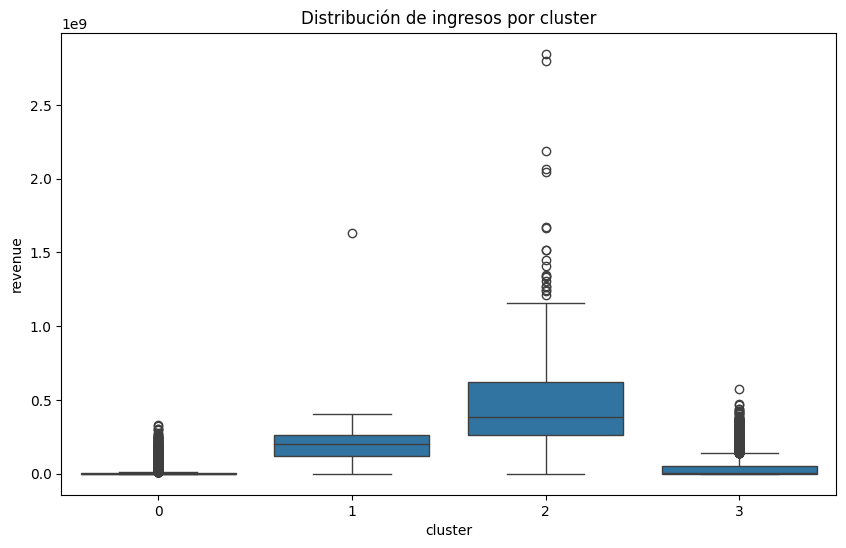

In [19]:
# Agregar la columna de clusters al dataset original
df_clustering["cluster"] = df_scaled["cluster"]

# Calcular estadísticas por cluster
cluster_summary = df_clustering.groupby("cluster").mean()
print("\nResumen de estadísticas por cluster:")
display(cluster_summary)

# Visualizar diferencias entre clusters
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clustering, x="cluster", y="revenue")
plt.title("Distribución de ingresos por cluster")
plt.show()

##### 5. Evaluar la calidad del clustering con el método de la silueta


Puntuación promedio de la silueta: 0.4742


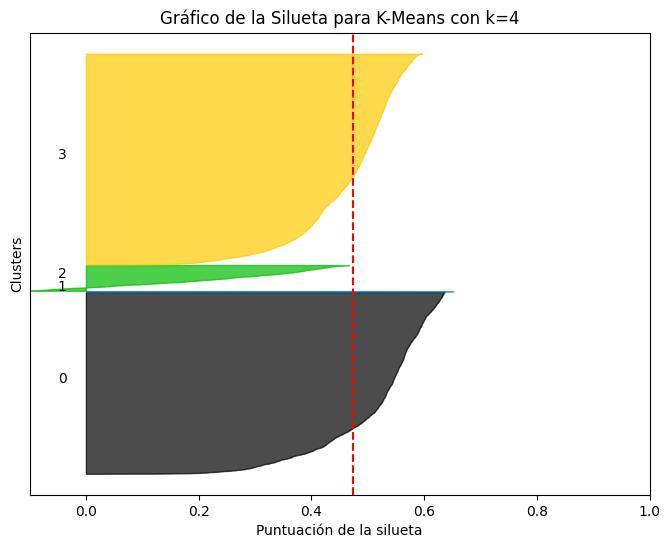

In [20]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

# Definir número de clusters
n_clusters = 4

# Calcular la puntuación de la silueta para cada muestra
silhouette_avg = silhouette_score(df_scaled, df_scaled["cluster"])
print(f"\nPuntuación promedio de la silueta: {silhouette_avg:.4f}")

# Visualización del análisis de la silueta
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Obtener las puntuaciones de la silueta de cada punto
sample_silhouette_values = silhouette_samples(df_scaled, df_scaled["cluster"])

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[df_scaled["cluster"] == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10  # Espacio entre clusters

ax.set_title("Gráfico de la Silueta para K-Means con k=4")
ax.set_xlabel("Puntuación de la silueta")
ax.set_ylabel("Clusters")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
plt.show()


 Puntuación promedio de la silueta con k=5: 0.2908


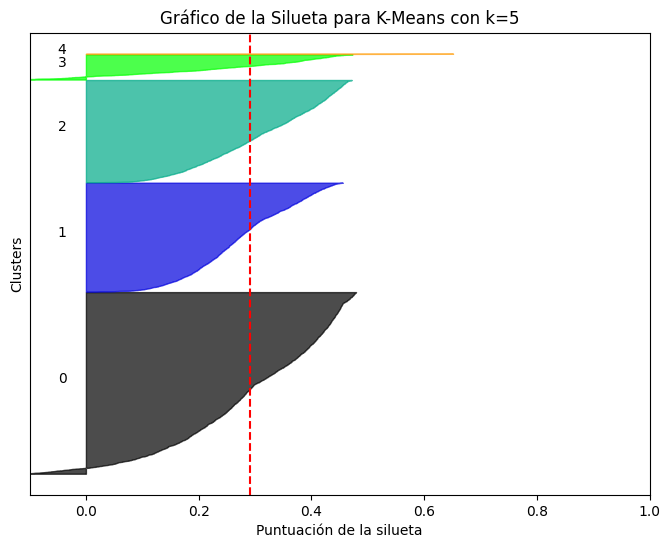

In [23]:
# Definir número de clusters
n_clusters = 5

# Calcular la puntuación de la silueta para cada muestra
silhouette_avg = silhouette_score(df_scaled, df_scaled["cluster"])
print(f"\n Puntuación promedio de la silueta con k={n_clusters}: {silhouette_avg:.4f}")

# Visualización del análisis de la silueta
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Obtener las puntuaciones de la silueta de cada punto
sample_silhouette_values = silhouette_samples(df_scaled, df_scaled["cluster"])

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[df_scaled["cluster"] == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10  # Espacio entre clusters

ax.set_title(f"Gráfico de la Silueta para K-Means con k={n_clusters}")
ax.set_xlabel("Puntuación de la silueta")
ax.set_ylabel("Clusters")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
plt.show()



 Puntuación promedio de la silueta con k=3: 0.2908


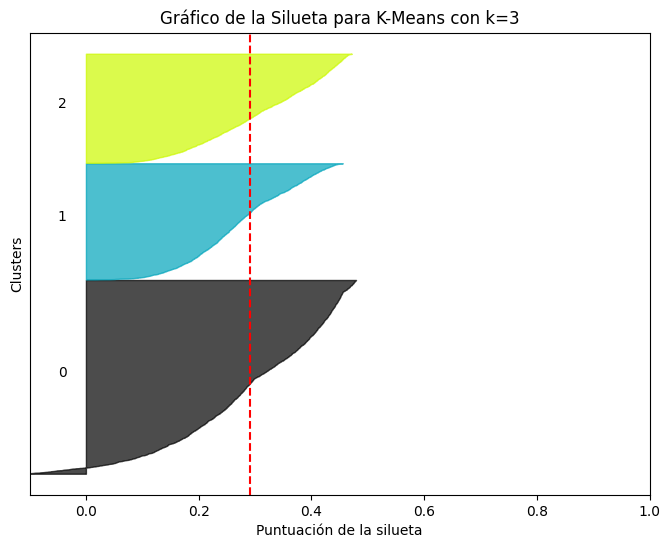

In [ ]:
# Definir número de clusters
n_clusters = 3

# Calcular la puntuación de la silueta para cada muestra
silhouette_avg = silhouette_score(df_scaled, df_scaled["cluster"])
print(f"\n Puntuación promedio de la silueta con k={n_clusters}: {silhouette_avg:.4f}")

# Visualización del análisis de la silueta
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Obtener las puntuaciones de la silueta de cada punto
sample_silhouette_values = silhouette_samples(df_scaled, df_scaled["cluster"])

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[df_scaled["cluster"] == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10  # Espacio entre clusters

ax.set_title(f"Gráfico de la Silueta para K-Means con k={n_clusters}")
ax.set_xlabel("Puntuación de la silueta")
ax.set_ylabel("Clusters")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
plt.show()